# World Development Indicators Analysis

## Overview
>* The World Development Indicators from the World Bank contain over a thousand annual indicators of economic development from hundreds of countries around the world.
* Data is available for more than 200 countries and for numerous aggregates (e.g. South Asia, eurozone, least developed countries etc.).
* Consists of more than 1,000 indicators on topics such as population, environment, government finance, national accounts, balance of payment, exchange rates, prices, financial statistics and trade.
* All indicators are available annually as time series and go back as far as 1960.


## Dataset
>* Country.csv- Contains information about a specific country, total 263 countries
* Country Code, Short Name, Currency, Region, Income Group
* Indicators.csv-Contains information about values of different indicators for listed countries in Country.csv, total 4000 indicators
* Country Code, Country Name, Indicator Name, Indicator Code, Year, Value
* 200k rows of data has been processed

#### Source: https://www.kaggle.com/theworldbank/world-development-indicators/

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## 1. Loading and cleaning of Country csv file

In [2]:
df_country = pd.read_csv('WDICountry.csv')

In [3]:
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,WB-3 code changed from ADO to AND to align wit...,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN


### 1.1 Check for null values

In [4]:
df_country.isnull().any()

Country Code                                         False
Short Name                                           False
Table Name                                           False
Long Name                                            False
2-alpha code                                          True
Currency Unit                                         True
Special Notes                                         True
Region                                                True
Income Group                                          True
WB-2 code                                             True
National accounts base year                           True
National accounts reference year                      True
SNA price valuation                                   True
Lending category                                      True
Other groups                                          True
System of National Accounts                           True
Alternative conversion factor                         Tr

### 1.2 Drop unwanted columns

In [5]:
df_country.drop(columns=['Table Name','Long Name','Special Notes','Other groups','System of National Accounts',\
                        'Balance of Payments Manual in use','Source of most recent Income and expenditure data',\
                        'Vital registration complete','Unnamed: 30'],axis=1,inplace=True)

### 1.3 Replacing spaces with underscores

In [6]:
df_country.columns = [c.replace(' ', '_') for c in df_country.columns]

In [7]:
df_country.head()

,Country_Code,Short_Name,2-alpha_code,Currency_Unit,Region,Income_Group,WB-2_code,National_accounts_base_year,National_accounts_reference_year,SNA_price_valuation,...,PPP_survey_year,External_debt_Reporting_status,System_of_trade,Government_Accounting_concept,IMF_data_dissemination_standard,Latest_population_census,Latest_household_survey,Latest_agricultural_census,Latest_industrial_data,Latest_trade_data
0,ABW,Aruba,AW,Aruban florin,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),...,2011,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,NaN,2016.0
1,AFG,Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),...,NaN,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015",NaN,NaN,2017.0
2,AGO,Angola,AO,Angolan kwanza,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at producer prices (VAP),...,2011,Actual,Special trade system,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16",NaN,NaN,2017.0
3,ALB,Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),...,Rolling,Actual,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",2012,2013.0,2017.0
4,AND,Andorra,AD,Euro,Europe & Central Asia,High income,AD,2000,NaN,Value added at basic prices (VAB),...,NaN,NaN,General trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,NaN,NaN


In [8]:
df_country.isna().sum()

Country_Code                          0
Short_Name                            0
2-alpha_code                          2
Currency_Unit                        46
Region                               46
Income_Group                         46
WB-2_code                             1
National_accounts_base_year          56
National_accounts_reference_year    210
SNA_price_valuation                  56
Lending_category                    120
Alternative_conversion_factor       216
PPP_survey_year                      72
External_debt_Reporting_status      140
System_of_trade                      60
Government_Accounting_concept       105
IMF_data_dissemination_standard      79
Latest_population_census             46
Latest_household_survey             111
Latest_agricultural_census          131
Latest_industrial_data              116
Latest_trade_data                    17
dtype: int64

In [9]:
len(df_country)

263

## 2. Loading and cleaning of Indicator csv file

In [10]:
df_indicators = pd.read_csv('WDIData.csv')

In [11]:
df_indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [12]:
len(df_indicators)

417120

### 2.1 Dropping the columns for years from 1960 to 1980 (because most of the columns did not have any data)

In [13]:
df_indicators.drop(columns=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972',\
                '1973','1974','1975','1976','1977','1978','1979','1980','Unnamed: 62'],axis=1,inplace=True)

In [14]:
df_indicators.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

In [15]:
df_indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1981,1982,1983,1984,1985,1986,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.243897,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.432827,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.460400,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN


### 2.2 Replacing spaces with underscores

In [16]:
df_indicators.columns = [c.replace(' ', '_') for c in df_indicators.columns]

In [17]:
df_indicators.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1981,1982,1983,1984,1985,1986,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.243897,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.432827,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.460400,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN


In [18]:
df_indicators.shape

(417120, 41)

### 2.3 Dropping NaN values by taking a threshold of 18 (approx half of 37 years from 1981 to 2017)

In [19]:
df_indicators.dropna(thresh=18,inplace=True)


In [20]:
df_indicators.shape

(200479, 41)

In [21]:
df_indicators.isna().any()

Country_Name      False
Country_Code      False
Indicator_Name    False
Indicator_Code    False
1981               True
1982               True
1983               True
1984               True
1985               True
1986               True
1987               True
1988               True
1989               True
1990               True
1991               True
1992               True
1993               True
1994               True
1995               True
1996               True
1997               True
1998               True
1999               True
2000               True
2001               True
2002               True
2003               True
2004               True
2005               True
2006               True
2007               True
2008               True
2009               True
2010               True
2011               True
2012               True
2013               True
2014               True
2015               True
2016               True
2017               True
dtype: bool

### 2.4 Converting columns to rows by using pd.melt

In [22]:
df_indicators=pd.melt(df_indicators, id_vars=['Country_Name'=='USA','Country_Code','Indicator_Name','Indicator_Code'],\
                      value_vars=['1981','1982','1983', '1984', '1985', '1986', '1987', '1988', '1989',\
                               '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',\
                               '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',\
                               '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017'])

C:\Users\RENUKA\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [23]:
len(df_indicators.Indicator_Name.unique())

1276

### 2.5 Dropping unwanted columns and renaming columns

In [24]:
df_indicators.columns

Index([False, 'Country_Code', 'Indicator_Name', 'Indicator_Code', 'variable',
       'value'],
      dtype='object')

In [25]:
df_indicators.drop(columns=False,axis=1,inplace=True)

In [26]:
df_indicators.rename(columns={'variable':'year'},inplace=True)

In [27]:
df_indicators.head()

,Country_Code,Indicator_Name,Indicator_Code,year,value
0,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1981,NaN
1,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1981,NaN
2,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1981,NaN
3,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,1981,NaN
4,ARB,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,1981,66.324501


### 2.6 Merging the two datasets

In [28]:
df_country_indicators=df_indicators.merge(df_country[['Country_Code','Short_Name','Region','Income_Group']], \
                                          left_on ='Country_Code',right_on='Country_Code',how='inner')

### 2.7 Renaming column

In [29]:
df_country_indicators.rename(columns={'Short_Name':'Country_Name'},inplace=True)


### 2.8 Dropping all null values from Region and Income Group

In [30]:
df_country_indicators.dropna(how='any',subset=['Region','Income_Group'],inplace=True)

In [31]:
df_country_indicators.value.isna().sum()

1209949

In [32]:
df_country_indicators.head()

,Country_Code,Indicator_Name,Indicator_Code,year,value,Country_Name,Region,Income_Group
1194730,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1981,NaN,Afghanistan,South Asia,Low income
1194731,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1981,NaN,Afghanistan,South Asia,Low income
1194732,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,1981,NaN,Afghanistan,South Asia,Low income
1194733,AFG,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,1981,NaN,Afghanistan,South Asia,Low income
1194734,AFG,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,1981,NaN,Afghanistan,South Asia,Low income


## Analysis 1: Comparative study of Aid Received in USD by different countries Vs GDP
## Period: 1981 - 2017


#### 1. Picked out those indicator codes which represent 'GDP' and 'Aid received in USD'

In [33]:
df_country_indicators_aid = df_country_indicators.loc[((df_country_indicators.Indicator_Code=='NY.GDP.MKTP.CD')\
                                    |(df_country_indicators.Indicator_Code=='DT.ODA.ALLD.CD'))]
                                  

In [34]:
df_country_indicators_aid.head()

,Country_Code,Indicator_Name,Indicator_Code,year,value,Country_Name,Region,Income_Group
1194955,AFG,GDP (current US$),NY.GDP.MKTP.CD,1981,3.478788e+09,Afghanistan,South Asia,Low income
1195204,AFG,Net official development assistance and offici...,DT.ODA.ALLD.CD,1981,2.391000e+07,Afghanistan,South Asia,Low income
1195767,AFG,GDP (current US$),NY.GDP.MKTP.CD,1982,NaN,Afghanistan,South Asia,Low income
1196016,AFG,Net official development assistance and offici...,DT.ODA.ALLD.CD,1982,9.330000e+06,Afghanistan,South Asia,Low income
1196579,AFG,GDP (current US$),NY.GDP.MKTP.CD,1983,NaN,Afghanistan,South Asia,Low income


#### 2. Pivoted the dataframe to convert rows into columns

In [35]:
df_country_indicators_aid=pd.pivot_table(df_country_indicators_aid,index=['Country_Code','year','Country_Name','Region','Income_Group'],\
                                         columns='Indicator_Name',values='value')

In [36]:
df_country_indicators_aid.head()

Indicator_Name                                                         GDP (current US$)  \
Country_Code year Country_Name Region                    Income_Group                      
ABW          1981 Aruba        Latin America & Caribbean High income                 NaN   
             1982 Aruba        Latin America & Caribbean High income                 NaN   
             1983 Aruba        Latin America & Caribbean High income                 NaN   
             1984 Aruba        Latin America & Caribbean High income                 NaN   
             1985 Aruba        Latin America & Caribbean High income                 NaN   

Indicator_Name                                                         Net official development assistance and official aid received (current US$)  
Country_Code year Country_Name Region                    Income_Group                                                                               
ABW          1981 Aruba        Latin America & Caribbean High income                                                 NaN                            
             1982 Aruba        Latin America & Caribbean High income                                                 NaN                            
             1983 Aruba        Latin America & Caribbean High income                                                 NaN                            
             1984 Aruba        Latin America & Caribbean High income                                                 NaN                            
             1985 Aruba        Latin America & Caribbean High income                                          12040000.0

#### 3. Renamed the columns

In [37]:
df_country_indicators_aid.rename(columns={'Net official development assistance and official aid received (current US$)':'Aid_Received_USD',\
                                           'GDP (current US$)':'GDP_USD'},inplace=True)

In [38]:
df_country_indicators_aid.head()

Indicator_Name                                                         GDP_USD  \
Country_Code year Country_Name Region                    Income_Group            
ABW          1981 Aruba        Latin America & Caribbean High income       NaN   
             1982 Aruba        Latin America & Caribbean High income       NaN   
             1983 Aruba        Latin America & Caribbean High income       NaN   
             1984 Aruba        Latin America & Caribbean High income       NaN   
             1985 Aruba        Latin America & Caribbean High income       NaN   

Indicator_Name                                                         Aid_Received_USD  
Country_Code year Country_Name Region                    Income_Group                    
ABW          1981 Aruba        Latin America & Caribbean High income                NaN  
             1982 Aruba        Latin America & Caribbean High income                NaN  
             1983 Aruba        Latin America & Caribbean High income                NaN  
             1984 Aruba        Latin America & Caribbean High income                NaN  
             1985 Aruba        Latin America & Caribbean High income         12040000.0

#### 4. Checked for null values

In [39]:
df_country_indicators_aid.isna().sum()

Indicator_Name
GDP_USD             1002
Aid_Received_USD    2281
dtype: int64

In [40]:
df_country_indicators_aid.loc[df_country_indicators_aid.GDP_USD.isna()==True]

Indicator_Name                                                                 GDP_USD  \
Country_Code year Country_Name Region                     Income_Group                   
ABW          1981 Aruba        Latin America & Caribbean  High income              NaN   
             1982 Aruba        Latin America & Caribbean  High income              NaN   
             1983 Aruba        Latin America & Caribbean  High income              NaN   
             1984 Aruba        Latin America & Caribbean  High income              NaN   
             1985 Aruba        Latin America & Caribbean  High income              NaN   
             1986 Aruba        Latin America & Caribbean  High income              NaN   
             1987 Aruba        Latin America & Caribbean  High income              NaN   
             1988 Aruba        Latin America & Caribbean  High income              NaN   
             1989 Aruba        Latin America & Caribbean  High income              NaN   
             1990 Aruba        Latin America & Caribbean  High income              NaN   
             1991 Aruba        Latin America & Caribbean  High income              NaN   
             1992 Aruba        Latin America & Caribbean  High income              NaN   
             1993 Aruba        Latin America & Caribbean  High income              NaN   
             2012 Aruba        Latin America & Caribbean  High income              NaN   
             2013 Aruba        Latin America & Caribbean  High income              NaN   
             2014 Aruba        Latin America & Caribbean  High income              NaN   
             2015 Aruba        Latin America & Caribbean  High income              NaN   
             2016 Aruba        Latin America & Caribbean  High income              NaN   
             2017 Aruba        Latin America & Caribbean  High income              NaN   
AFG          1982 Afghanistan  South Asia                 Low income               NaN   
             1983 Afghanistan  South Asia                 Low income               NaN   
             1984 Afghanistan  South Asia                 Low income               NaN   
             1985 Afghanistan  South Asia                 Low income               NaN   
             1986 Afghanistan  South Asia                 Low income               NaN   
             1987 Afghanistan  South Asia                 Low income               NaN   
             1988 Afghanistan  South Asia                 Low income               NaN   
             1989 Afghanistan  South Asia                 Low income               NaN   
             1990 Afghanistan  South Asia                 Low income               NaN   
             1991 Afghanistan  South Asia                 Low income               NaN   
             1992 Afghanistan  South Asia                 Low income               NaN   
...                                                                                ...   
WSM          1981 Samoa        East Asia & Pacific        Upper middle income      NaN   
XKX          1981 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1982 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1983 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1984 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1985 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1986 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1987 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1988 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1989 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1990 Kosovo       Europe & Central Asia      Lower middle income      NaN   
             1991 Kosovo       Europe & 

#### 5. Dropped all the null values in 'GDP_USD' column

In [41]:
df_country_indicators_aid.dropna(how='any',subset=['GDP_USD'],inplace=True)

#### 6. Forward filled all the values for the 'Aid Received' column

In [42]:
df_country_indicators_aid.Aid_Received_USD.fillna(method='ffill',inplace=True)

#### 7. Confirmed that there are no null values in the dataframe

In [43]:
df_country_indicators_aid.isna().sum()

Indicator_Name
GDP_USD             0
Aid_Received_USD    0
dtype: int64

#### 8. There were some values in 'Aid_Received_USD' which were less than zero. They had to be removed

In [44]:
df_country_indicators_aid[df_country_indicators_aid.Aid_Received_USD<0]=0

#### 9. Correlation between GDP and Aid Recieved

In [45]:
df_country_indicators_aid.corr()

Indicator_Name,GDP_USD,Aid_Received_USD
Indicator_Name,,
GDP_USD,1.000000,0.056148
Aid_Received_USD,0.056148,1.000000


#### Here we found a weak correlation between GDP and Aid_Received. So we decided to use clustering for our correlation. 

### Machine Learning algorithm used: Clustering

In [46]:
from sklearn.cluster import KMeans

In [47]:
clu =KMeans(n_clusters=2,random_state=0)

In [48]:
clu

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [49]:
clu.fit(df_country_indicators_aid)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [50]:
clu.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
df_country_indicators_aid3=df_country_indicators_aid.copy()

In [52]:
df_country_indicators_aid3.shape

(6842, 2)

In [53]:
df_country_indicators_aid3['cluster']=clu.labels_

In [54]:
df_country_indicators_aid3.head()

Indicator_Name                                                              GDP_USD  \
Country_Code year Country_Name Region                    Income_Group                 
ABW          1994 Aruba        Latin America & Caribbean High income   1.330168e+09   
             1995 Aruba        Latin America & Caribbean High income   1.320670e+09   
             1996 Aruba        Latin America & Caribbean High income   1.379888e+09   
             1997 Aruba        Latin America & Caribbean High income   1.531844e+09   
             1998 Aruba        Latin America & Caribbean High income   1.665363e+09   

Indicator_Name                                                         Aid_Received_USD  \
Country_Code year Country_Name Region                    Income_Group                     
ABW          1994 Aruba        Latin America & Caribbean High income         18260000.0   
             1995 Aruba        Latin America & Caribbean High income         25800000.0   
             1996 Aruba        Latin America & Caribbean High income         19530000.0   
             1997 Aruba        Latin America & Caribbean High income         25070000.0   
             1998 Aruba        Latin America & Caribbean High income         11260000.0   

Indicator_Name                                                         cluster  
Country_Code year Country_Name Region                    Income_Group           
ABW          1994 Aruba        Latin America & Caribbean High income         0  
             1995 Aruba        Latin America & Caribbean High income         0  
             1996 Aruba        Latin America & Caribbean High income         0  
             1997 Aruba        Latin America & Caribbean High income         0  
             1998 Aruba        Latin America & Caribbean High income         0

In [55]:
df_country_indicators_aid3.groupby('cluster').mean()

Indicator_Name,GDP_USD,Aid_Received_USD
cluster,,
0,1.463743e+11,4.633826e+08
1,1.153519e+13,2.149455e+08


In [56]:
df_country_indicators_aid3['developed']=df_country_indicators_aid3.GDP_USD>=1.4e+11

In [57]:
df_country_indicators_aid3.head()

Indicator_Name                                                              GDP_USD  \
Country_Code year Country_Name Region                    Income_Group                 
ABW          1994 Aruba        Latin America & Caribbean High income   1.330168e+09   
             1995 Aruba        Latin America & Caribbean High income   1.320670e+09   
             1996 Aruba        Latin America & Caribbean High income   1.379888e+09   
             1997 Aruba        Latin America & Caribbean High income   1.531844e+09   
             1998 Aruba        Latin America & Caribbean High income   1.665363e+09   

Indicator_Name                                                         Aid_Received_USD  \
Country_Code year Country_Name Region                    Income_Group                     
ABW          1994 Aruba        Latin America & Caribbean High income         18260000.0   
             1995 Aruba        Latin America & Caribbean High income         25800000.0   
             1996 Aruba        Latin America & Caribbean High income         19530000.0   
             1997 Aruba        Latin America & Caribbean High income         25070000.0   
             1998 Aruba        Latin America & Caribbean High income         11260000.0   

Indicator_Name                                                         cluster  \
Country_Code year Country_Name Region                    Income_Group            
ABW          1994 Aruba        Latin America & Caribbean High income         0   
             1995 Aruba        Latin America & Caribbean High income         0   
             1996 Aruba        Latin America & Caribbean High income         0   
             1997 Aruba        Latin America & Caribbean High income         0   
             1998 Aruba        Latin America & Caribbean High income         0   

Indicator_Name                                                         developed  
Country_Code year Country_Name Region                    Income_Group             
ABW          1994 Aruba        Latin America & Caribbean High income       False  
             1995 Aruba        Latin America & Caribbean High income       False  
             1996 Aruba        Latin America & Caribbean High income       False  
             1997 Aruba        Latin America & Caribbean High income       False  
             1998 Aruba        Latin America & Caribbean High income       False

In [58]:
df_country_indicators_aid3.groupby('developed').agg({'Aid_Received_USD':['size','mean']})

Aid_Received_USD              
                      size          mean
developed                               
False                 5655  4.087092e+08
True                  1187  7.173644e+08

#### By implementing Clustering, we found out that even though a country is developed, the amount of aid received by the country is more than those of developing countries. We have tried to show the same using a bar plot

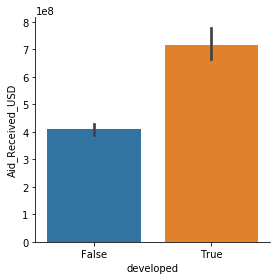

In [59]:
sns.factorplot(x='developed',y='Aid_Received_USD',data=df_country_indicators_aid3,kind='bar')

In [60]:
df_country_indicators_aid3['binned_aid_received']=pd.cut(df_country_indicators_aid3.Aid_Received_USD,5)

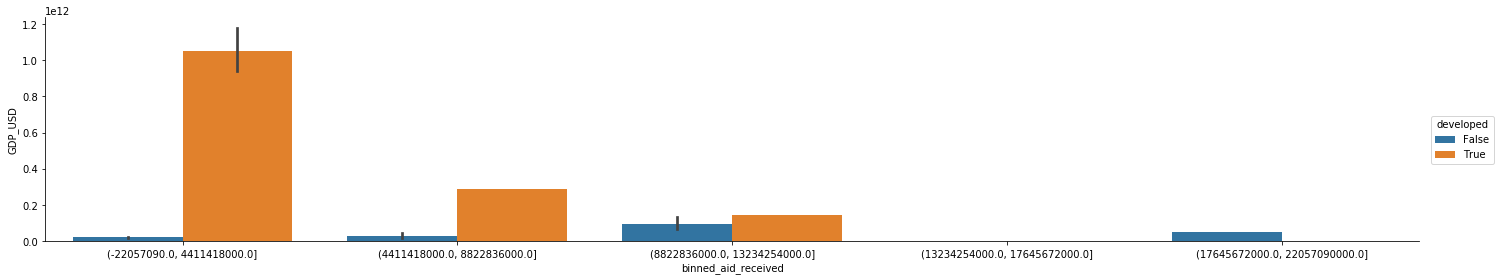

In [61]:

sns.factorplot(x='binned_aid_received',y='GDP_USD',hue='developed',data=df_country_indicators_aid3,kind='bar',aspect=5)

#### We then decided to find out the maximum aid received in the last 5 years.

In [62]:
df_country_indicators_aid.reset_index(inplace=True)

In [63]:
df_country_indicators_aid_5_years=df_country_indicators_aid[df_country_indicators_aid.year>'2012']

In [64]:
df_country_indicators_aid_5_years.head()

Indicator_Name,Country_Code,year,Country_Name,Region,Income_Group,GDP_USD,Aid_Received_USD
31,AFG,2013,Afghanistan,South Asia,Low income,2.026425e+10,5.152540e+09
32,AFG,2014,Afghanistan,South Asia,Low income,2.061610e+10,4.942970e+09
33,AFG,2015,Afghanistan,South Asia,Low income,1.921556e+10,4.237290e+09
34,AFG,2016,Afghanistan,South Asia,Low income,1.946902e+10,4.064330e+09
35,AFG,2017,Afghanistan,South Asia,Low income,2.081530e+10,4.064330e+09


In [65]:
df_country_indicators_aid_5_years_1=df_country_indicators_aid_5_years.groupby('Country_Name')['Aid_Received_USD'].sum().nlargest(50)

In [66]:
df_country_indicators_aid_5_years_1=df_country_indicators_aid_5_years_1.to_frame()

In [67]:
df_country_indicators_aid_5_years_1.reset_index(inplace=True)

In [68]:
df_country_indicators_aid_5_years_1.head(10)

,Country_Name,Aid_Received_USD
0,Afghanistan,2.246146e+10
1,Finland,2.036770e+10
2,Ethiopia,1.885029e+10
3,Vietnam,1.724484e+10
4,Egypt,1.581012e+10
5,Turkey,1.566583e+10
6,Pakistan,1.546354e+10
7,India,1.397987e+10
8,Japan,1.369335e+10
9,Ireland,1.339340e+10


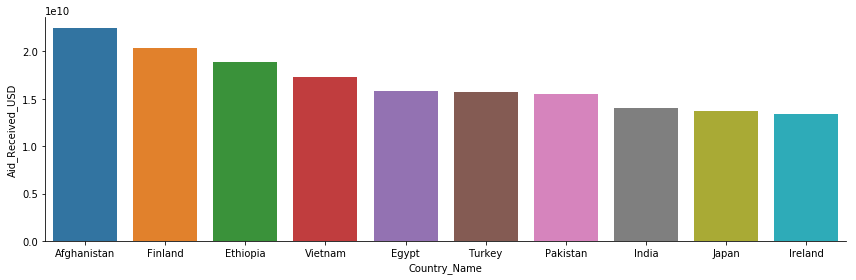

In [69]:
sns.factorplot(x='Country_Name',y='Aid_Received_USD',data=df_country_indicators_aid_5_years_1.head(10),kind='bar',aspect=3)

### Observation:
>* In last 5 years, Afghanistan has received highest financial funds from the US government. 
* Interesting thing to note down here is that Finland has recieved 2nd highest funds in the last 5 years

#### We then decided to find out the maximum aid received in the last 10 years.

In [70]:
df_country_indicators_aid_10_years=df_country_indicators_aid[df_country_indicators_aid.year>'2006']

In [71]:
df_country_indicators_aid_10_years.head()

Indicator_Name,Country_Code,year,Country_Name,Region,Income_Group,GDP_USD,Aid_Received_USD
13,ABW,2007,Aruba,Latin America & Caribbean,High income,0.0,0.0
14,ABW,2008,Aruba,Latin America & Caribbean,High income,0.0,0.0
15,ABW,2009,Aruba,Latin America & Caribbean,High income,0.0,0.0
16,ABW,2010,Aruba,Latin America & Caribbean,High income,0.0,0.0
17,ABW,2011,Aruba,Latin America & Caribbean,High income,0.0,0.0


In [72]:
df_country_indicators_aid_10_years_1=df_country_indicators_aid_10_years.groupby('Country_Name')['Aid_Received_USD'].sum().nlargest(50)

In [73]:
df_country_indicators_aid_10_years_1=df_country_indicators_aid_10_years_1.to_frame()

In [74]:
df_country_indicators_aid_10_years_1.reset_index(inplace=True)

In [75]:
df_country_indicators_aid_10_years_1.head(10)

,Country_Name,Aid_Received_USD
0,Afghanistan,5.865097e+10
1,Finland,4.480894e+10
2,Ethiopia,3.879119e+10
3,Vietnam,3.672357e+10
4,Iraq,3.623737e+10
5,Pakistan,3.055640e+10
6,Japan,3.012537e+10
7,Tanzania,2.980825e+10
8,Ireland,2.946548e+10
9,Dem. Rep. Congo,2.913175e+10


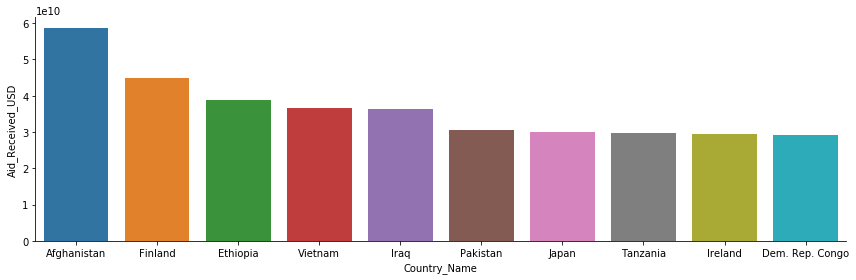

In [76]:
sns.factorplot(x='Country_Name',y='Aid_Received_USD',data=df_country_indicators_aid_10_years_1.head(10),kind='bar',aspect=3)

### Observation:
>* In last 10 years, Afghanistan has still received highest financial funds from the US government. 
* Countries like Iraq have got more funding

#### We then decided to find out the maximum aid received in the last 20 years.

In [77]:
df_country_indicators_aid_20_years=df_country_indicators_aid[df_country_indicators_aid.year>'1996']

In [78]:
df_country_indicators_aid_20_years.head()

Indicator_Name,Country_Code,year,Country_Name,Region,Income_Group,GDP_USD,Aid_Received_USD
3,ABW,1997,Aruba,Latin America & Caribbean,High income,1.531844e+09,25070000.0
4,ABW,1998,Aruba,Latin America & Caribbean,High income,1.665363e+09,11260000.0
5,ABW,1999,Aruba,Latin America & Caribbean,High income,0.000000e+00,0.0
6,ABW,2000,Aruba,Latin America & Caribbean,High income,1.873453e+09,11500000.0
7,ABW,2001,Aruba,Latin America & Caribbean,High income,0.000000e+00,0.0


In [79]:
df_country_indicators_aid_20_years_1=df_country_indicators_aid_20_years.groupby('Country_Name')['Aid_Received_USD'].sum().nlargest(50)

In [80]:
df_country_indicators_aid_20_years_1=df_country_indicators_aid_20_years_1.to_frame()

In [81]:
df_country_indicators_aid_20_years_1.reset_index(inplace=True)

In [82]:
df_country_indicators_aid_20_years_1.head(10)

,Country_Name,Aid_Received_USD
0,Finland,8.554434e+10
1,Iraq,7.183443e+10
2,Afghanistan,7.007536e+10
3,Japan,5.751207e+10
4,Ireland,5.625228e+10
5,Vietnam,5.209054e+10
6,Ethiopia,5.120490e+10
7,Iceland,4.798101e+10
8,Pakistan,4.433155e+10
9,Tanzania,4.322518e+10


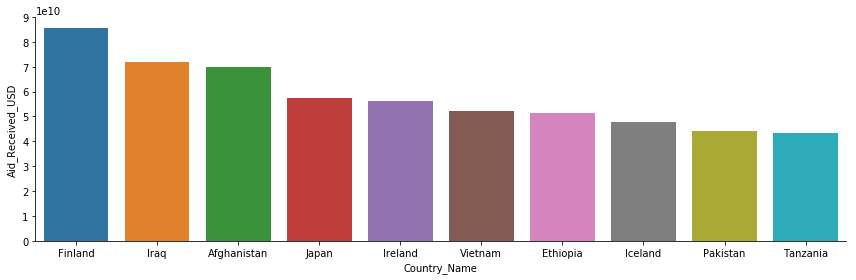

In [83]:
sns.factorplot(x='Country_Name',y='Aid_Received_USD',data=df_country_indicators_aid_20_years_1.head(10),kind='bar',aspect=3)

### Observation:
>* In last 20 years, Finland received highest average financial funds from the US government. 
* Iraq, Afghanistan and Japan have received a large amount of financial aid.

### Finding:
>* Although, Finland is wealthy country they have recieved highest funds since Finland has largest European Fundrising association.
* In more recent years, especially due to war efforts, Iraq, Pakistan and Afghanistan have received financial funds from the US government.
* Also, countries like Nepal, Rwanda, Malawi and Haiti, to name a few, are impoverished countries that desperately require financial assistance, but have not received sufficient amounts of it.

## Analysis 2: Analysis of women employment in South Asian Vs North American countries
#### In this analysis, we have performed following steps
>* Correlation between the different indicators
* Analysis of female employment to population ratio with GDP per person employed using Clustering

## Period: 1981 - 2017

#### 1. Pulled out following indicators:

>* GDP (constant 2010 US\$)
* GDP per person employed (constant 2011 PPP \$)
* Employment to population ratio, 15+, female (%) (modeled ILO estimate)
* Population ages 15-64, female
* Population ages 65 and above, female
* Life expectancy at birth, female (years)
* Adolescent fertility rate (births per 1,000 women ages 15-19)
* Mortality rate, adult, female (per 1,000 female adults)
* Population, female
* Proportion of seats held by women in national parliaments (%)

In [84]:
df_country_indicators_women=df_country_indicators.loc[((df_country_indicators.Indicator_Code=='SP.DYN.LE00.FE.IN')\
                                    |(df_country_indicators.Indicator_Code=='NY.GDP.MKTP.KD')\
                                    |(df_country_indicators.Indicator_Code=='SL.GDP.PCAP.EM.KD')\
                                    |(df_country_indicators.Indicator_Code=='SP.POP.TOTL.FE.IN')\
                                    |(df_country_indicators.Indicator_Code=='SP.POP.1564.FE.IN')\
                                    |(df_country_indicators.Indicator_Code=='SP.POP.65UP.FE.IN')\
                                    |(df_country_indicators.Indicator_Code=='SP.DYN.AMRT.FE')\
                                    |(df_country_indicators.Indicator_Code=='SP.ADO.TFRT')\
                                    |(df_country_indicators.Indicator_Code=='SL.EMP.TOTL.SP.FE.ZS')\
                                    |(df_country_indicators.Indicator_Code=='SG.GEN.PARL.ZS'))\
                                    &((df_country_indicators.Region=='South Asia')|(df_country_indicators.Region=='North America'))]

In [85]:
df_country_indicators_women.head()

,Country_Code,Indicator_Name,Indicator_Code,year,value,Country_Name,Region,Income_Group
1194754,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1981,154.5224,Afghanistan,South Asia,Low income
1194898,AFG,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,1981,NaN,Afghanistan,South Asia,Low income
1194952,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1981,NaN,Afghanistan,South Asia,Low income
1194966,AFG,GDP per person employed (constant 2011 PPP $),SL.GDP.PCAP.EM.KD,1981,NaN,Afghanistan,South Asia,Low income
1195093,AFG,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1981,43.3690,Afghanistan,South Asia,Low income


#### 2. Pivoted the dataframe to convert rows into columns

In [86]:
df_country_indicators_women=pd.pivot_table(df_country_indicators_women,index=['Country_Name','Country_Code','year','Region',\
                                        'Income_Group'],columns='Indicator_Name',values='value')

In [87]:
df_country_indicators_women.head()

Indicator_Name                                          Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Country_Name Country_Code year Region     Income_Group                                                                  
Afghanistan  AFG          1981 South Asia Low income                                             154.5224               
                          1982 South Asia Low income                                             155.6310               
                          1983 South Asia Low income                                             156.7438               
                          1984 South Asia Low income                                             157.8566               
                          1985 South Asia Low income                                             158.9694               

Indicator_Name                                          Employment to population ratio, 15+, female (%) (modeled ILO estimate)  \
Country_Name Country_Code year Region     Income_Group                                                                           
Afghanistan  AFG          1981 South Asia Low income                                                  NaN                        
                          1982 South Asia Low income                                                  NaN                        
                          1983 South Asia Low income                                                  NaN                        
                          1984 South Asia Low income                                                  NaN                        
                          1985 South Asia Low income                                                  NaN                        

Indicator_Name                                          GDP (constant 2010 US$)  \
Country_Name Country_Code year Region     Income_Group                            
Afghanistan  AFG          1981 South Asia Low income                        NaN   
                          1982 South Asia Low income                        NaN   
                          1983 South Asia Low income                        NaN   
                          1984 South Asia Low income                        NaN   
                          1985 South Asia Low income                        NaN   

Indicator_Name                                          GDP per person employed (constant 2011 PPP $)  \
Country_Name Country_Code year Region     Income_Group                                                  
Afghanistan  AFG          1981 South Asia Low income                                              NaN   
                          1982 South Asia Low income                                              NaN   
                          1983 South Asia Low income                                              NaN   
                          1984 South Asia Low income                                              NaN   
                          1985 South Asia Low income                                              NaN   

Indicator_Name                                          Life expectancy at birth, female (years)  \
Country_Name Country_Code year Region     Income_Group                                             
Afghanistan  AFG          1981 South Asia Low income                                      43.369   
                          1982 South Asia Low income                                      44.080   
                          1983 South Asia Low income                                      44.837   
                          1984 South Asia Low income                                      45.636   
                          1985 South Asia Low income                                      46.473   

Indicator_Name                                          Mortality rate, adult, female (per 1,000 female adults)  \
Country_Name Country_Code year Region     Income_Group                                                     

#### 3. Gave short names to columns by renaming them

In [88]:
df_country_indicators_women.rename(columns={'GDP (constant 2010 US$)':'GDP_USD','GDP per person employed (constant 2011 PPP $)':'GDP_per_person_employed',\
                                        'Life expectancy at birth, female (years)':'LE_birth',\
                                        'Mortality rate, adult, female (per 1,000 female adults)':'Mort_rate',\
                                        'Population ages 15-64, female':'Pop_fem_1564',\
                                        'Population ages 65 and above, female':'Pop_fem_65+',\
                                        'Adolescent fertility rate (births per 1,000 women ages 15-19)':'Adol_Fert_rate',\
                                        'Employment to population ratio, 15+, female (%) (modeled ILO estimate)':'Emp_Pop_ratio_fem',\
                                        'Population, female':'Pop_Fem',\
                                        'Proportion of seats held by women in national parliaments (%)':'Par_Prop'},inplace=True)

#### 4. Checked for null values

In [89]:
df_country_indicators_women.isna().sum()

Indicator_Name
Adol_Fert_rate              47
Emp_Pop_ratio_fem          137
GDP_USD                     39
GDP_per_person_employed    137
LE_birth                    29
Mort_rate                   53
Pop_fem_1564                37
Pop_fem_65+                 37
Pop_Fem                     37
Par_Prop                   205
dtype: int64

In [90]:
df_country_indicators_women[df_country_indicators_women.GDP_per_person_employed.isna()==True]

Indicator_Name                                                     Adol_Fert_rate  \
Country_Name  Country_Code year Region        Income_Group                          
Afghanistan   AFG          1981 South Asia    Low income                 154.5224   
                           1982 South Asia    Low income                 155.6310   
                           1983 South Asia    Low income                 156.7438   
                           1984 South Asia    Low income                 157.8566   
                           1985 South Asia    Low income                 158.9694   
                           1986 South Asia    Low income                 160.0822   
                           1987 South Asia    Low income                 161.1950   
                           1988 South Asia    Low income                 161.7418   
                           1989 South Asia    Low income                 162.2886   
                           1990 South Asia    Low income                 162.8354   
Bangladesh    BGD          1981 South Asia    Lower middle income        190.5266   
                           1982 South Asia    Lower middle income        188.5480   
                           1983 South Asia    Lower middle income        184.7790   
                           1984 South Asia    Lower middle income        181.0100   
                           1985 South Asia    Lower middle income        177.2410   
                           1986 South Asia    Lower middle income        173.4720   
                           1987 South Asia    Lower middle income        169.7030   
                           1988 South Asia    Lower middle income        164.4542   
                           1989 South Asia    Lower middle income        159.2054   
                           1990 South Asia    Lower middle income        153.9566   
Bermuda       BMU          1981 North America High income                     NaN   
                           1982 North America High income                     NaN   
                           1983 North America High income                     NaN   
                           1984 North America High income                     NaN   
                           1985 North America High income                     NaN   
                           1986 North America High income                     NaN   
                           1987 North America High income                     NaN   
                           1988 North America High income                     NaN   
                           1989 North America High income                     NaN   
                           1990 North America High income                     NaN   
...                                                                           ...   
Pakistan      PAK          1981 South Asia    Lower middle income        104.3148   
                           1982 South Asia    Lower middle income        103.5940   
                           1983 South Asia    Lower middle income        101.9140   
                           1984 South Asia    Lower middle income        100.2340   
                           1985 South Asia    Lower middle income         98.5540   
                           1986 South Asia    Lower middle income         96.8740   
                           1987 South Asia    Lower middle income         95.1940   
                           1988 South Asia    Lower middle income         91.3710   
                           1989 South Asia    Lower middle income         87.5480   
                           1990 South Asia    Lower middle income         83.7250   
Sri Lanka     LKA          1981 South Asia    Lower middle income         39.1524   
                           1982 South Asia    Lower middle income         38.7380   
                           1983 South Asia    Lower middle income         37.6946   
                           1984 South Asia    Lower middle income         36.6512   
     

#### 5. Replace nulls with 0 

In [91]:
df_country_indicators_women.fillna(value=0,inplace=True)

#### 6. Confirmed if there are any more null values

In [92]:
df_country_indicators_women.isna().sum()

Indicator_Name
Adol_Fert_rate             0
Emp_Pop_ratio_fem          0
GDP_USD                    0
GDP_per_person_employed    0
LE_birth                   0
Mort_rate                  0
Pop_fem_1564               0
Pop_fem_65+                0
Pop_Fem                    0
Par_Prop                   0
dtype: int64

#### 7. Correlation between different indicators

In [93]:
df_country_indicators_women.corr()

Indicator_Name,Adol_Fert_rate,Emp_Pop_ratio_fem,GDP_USD,GDP_per_person_employed,LE_birth,Mort_rate,Pop_fem_1564,Pop_fem_65+,Pop_Fem,Par_Prop
Indicator_Name,,,,,,,,,,
Adol_Fert_rate,1.000000,-0.206141,-0.190137,-0.364140,-0.094219,0.831624,-0.049315,-0.143502,-0.032155,-0.235721
Emp_Pop_ratio_fem,-0.206141,1.000000,0.241005,0.518701,0.278630,-0.144242,0.016295,0.119301,0.004766,0.458060
GDP_USD,-0.190137,0.241005,1.000000,0.738698,0.233765,-0.262007,0.243294,0.631895,0.224583,0.175172
GDP_per_person_employed,-0.364140,0.518701,0.738698,1.000000,0.326390,-0.387157,0.071729,0.372795,0.054646,0.381151
LE_birth,-0.094219,0.278630,0.233765,0.326390,1.000000,-0.082684,0.044927,0.140310,0.039069,0.161795
Mort_rate,0.831624,-0.144242,-0.262007,-0.387157,-0.082684,1.000000,-0.000947,-0.132718,0.014335,-0.229300
Pop_fem_1564,-0.049315,0.016295,0.243294,0.071729,0.044927,-0.000947,1.000000,0.898085,0.998486,0.069253
Pop_fem_65+,-0.143502,0.119301,0.631895,0.372795,0.140310,-0.132718,0.898085,1.000000,0.884406,0.127423
Pop_Fem,-0.032155,0.004766,0.224583,0.054646,0.039069,0.014335,0.998486,0.884406,1.000000,0.058180


#### After analyzing the correlation, we found that there was a correlation between the female employment to population ratio and the GDP per person employed
#### So we decided to analyze it using Clustering machine learning algorithm

### Machine Learning algorithm used: Clustering
### Analysis of female employment to population ratio with GDP per person employed

In [94]:
df_country_indicators_women.replace(inf,0,inplace=True)

In [95]:
df_country_indicators_women.head()

Indicator_Name                                          Adol_Fert_rate  \
Country_Name Country_Code year Region     Income_Group                   
Afghanistan  AFG          1981 South Asia Low income          154.5224   
                          1982 South Asia Low income          155.6310   
                          1983 South Asia Low income          156.7438   
                          1984 South Asia Low income          157.8566   
                          1985 South Asia Low income          158.9694   

Indicator_Name                                          Emp_Pop_ratio_fem  \
Country_Name Country_Code year Region     Income_Group                      
Afghanistan  AFG          1981 South Asia Low income                  0.0   
                          1982 South Asia Low income                  0.0   
                          1983 South Asia Low income                  0.0   
                          1984 South Asia Low income                  0.0   
                          1985 South Asia Low income                  0.0   

Indicator_Name                                          GDP_USD  \
Country_Name Country_Code year Region     Income_Group            
Afghanistan  AFG          1981 South Asia Low income        0.0   
                          1982 South Asia Low income        0.0   
                          1983 South Asia Low income        0.0   
                          1984 South Asia Low income        0.0   
                          1985 South Asia Low income        0.0   

Indicator_Name                                          GDP_per_person_employed  \
Country_Name Country_Code year Region     Income_Group                            
Afghanistan  AFG          1981 South Asia Low income                        0.0   
                          1982 South Asia Low income                        0.0   
                          1983 South Asia Low income                        0.0   
                          1984 South Asia Low income                        0.0   
                          1985 South Asia Low income                        0.0   

Indicator_Name                                          LE_birth  Mort_rate  \
Country_Name Country_Code year Region     Income_Group                        
Afghanistan  AFG          1981 South Asia Low income      43.369    427.478   
                          1982 South Asia Low income      44.080    420.190   
                          1983 South Asia Low income      44.837    410.705   
                          1984 South Asia Low income      45.636    401.220   
                          1985 South Asia Low income      46.473    391.735   

Indicator_Name                                          Pop_fem_1564  \
Country_Name Country_Code year Region     Income_Group                 
Afghanistan  AFG          1981 South Asia Low income       3300022.0   
                          1982 South Asia Low income       3206912.0   
                          1983 South Asia Low income       3103131.0   
                          1984 South Asia Low income       3005099.0   
                          1985 South Asia Low income       2924074.0   

Indicator_Name                                          Pop_fem_65+  \
Country_Name Country_Code year Region     Income_Group                
Afghanistan  AFG          1981 South Asia Low income       162574.0   
                          1982 South Asia Low income       158312.0   
                          1983 South Asia Low income       151727.0   
                          1984 South Asia Low income       143562.0   
                          1985 South Asia Low income       134186.0   

Indicator_Name                                            Pop_Fem  Par_Prop  
Country_Name Country_Code year Region     Income_Group                       
Afghanistan  AFG          1981 South Asia Low income    6411284.0       0.0  
                          1982 South Asia Low income    6255675.0       0.0  
                    

In [96]:
df_country_indicators_women.reset_index(inplace=True)
df_country_indicators_women1=df_country_indicators_women[['Country_Name','year','Region','Income_Group','GDP_USD','GDP_per_person_employed',\
                                                         'LE_birth','Adol_Fert_rate','Emp_Pop_ratio_fem',\
                                                         'Par_Prop','Pop_fem_1564']]

In [97]:
df_country_indicators_women1.set_index(['year', 'Country_Name','Income_Group','Region'],inplace=True)

In [98]:
from sklearn.cluster import KMeans

In [99]:
clu =KMeans(n_clusters=2,random_state=0)

In [100]:
clu

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [101]:
clu.fit(df_country_indicators_women1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [102]:
clu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
df_country_indicators_women2=df_country_indicators_women1.copy()

In [104]:
df_country_indicators_women2.shape

(407, 7)

In [105]:
df_country_indicators_women2['cluster']=clu.labels_

In [106]:
df_country_indicators_women2.head()

,,,Indicator_Name,GDP_USD,GDP_per_person_employed,LE_birth,Adol_Fert_rate,Emp_Pop_ratio_fem,Par_Prop,Pop_fem_1564,cluster
year,Country_Name,Income_Group,Region,,,,,,,,
1981,Afghanistan,Low income,South Asia,0.0,0.0,43.369,154.5224,0.0,0.0,3300022.0,0
1982,Afghanistan,Low income,South Asia,0.0,0.0,44.080,155.6310,0.0,0.0,3206912.0,0
1983,Afghanistan,Low income,South Asia,0.0,0.0,44.837,156.7438,0.0,0.0,3103131.0,0
1984,Afghanistan,Low income,South Asia,0.0,0.0,45.636,157.8566,0.0,0.0,3005099.0,0
1985,Afghanistan,Low income,South Asia,0.0,0.0,46.473,158.9694,0.0,0.0,2924074.0,0


In [107]:
df_country_indicators_women2.groupby('cluster').mean()

Indicator_Name,GDP_USD,GDP_per_person_employed,LE_birth,Adol_Fert_rate,Emp_Pop_ratio_fem,Par_Prop,Pop_fem_1564
cluster,,,,,,,
0,2.555322e+11,11905.835678,61.491157,68.395681,25.538467,6.663784,4.085932e+07
1,1.190656e+13,70818.739865,77.391892,43.737816,39.578270,8.902703,9.181589e+07


In [108]:
df_country_indicators_women2['developed']=df_country_indicators_women2.GDP_per_person_employed>=12000

In [109]:
df_country_indicators_women2.head()

,,,Indicator_Name,GDP_USD,GDP_per_person_employed,LE_birth,Adol_Fert_rate,Emp_Pop_ratio_fem,Par_Prop,Pop_fem_1564,cluster,developed
year,Country_Name,Income_Group,Region,,,,,,,,,
1981,Afghanistan,Low income,South Asia,0.0,0.0,43.369,154.5224,0.0,0.0,3300022.0,0,False
1982,Afghanistan,Low income,South Asia,0.0,0.0,44.080,155.6310,0.0,0.0,3206912.0,0,False
1983,Afghanistan,Low income,South Asia,0.0,0.0,44.837,156.7438,0.0,0.0,3103131.0,0,False
1984,Afghanistan,Low income,South Asia,0.0,0.0,45.636,157.8566,0.0,0.0,3005099.0,0,False
1985,Afghanistan,Low income,South Asia,0.0,0.0,46.473,158.9694,0.0,0.0,2924074.0,0,False


In [110]:
df_country_indicators_women2.groupby('developed').agg({'Emp_Pop_ratio_fem':['size','mean'],'Pop_fem_1564':['mean'],\
                                             'LE_birth':['mean'],'Adol_Fert_rate':['mean'],'Par_Prop':['mean']})

Emp_Pop_ratio_fem             Pop_fem_1564   LE_birth  \
                       size       mean          mean       mean   
developed                                                         
False                   262  19.105546  4.406802e+07  58.364676   
True                    145  40.744662  4.806423e+07  71.197814   

          Adol_Fert_rate   Par_Prop  
                    mean       mean  
developed                            
False          85.707302   4.848473  
True           30.823364  10.515172

#### Observation :
>* If the female employment to population ratio is higher, then there is a chance that the country is developed

#### We have tried to show the same using a bar plot

In [111]:
df_country_indicators_women2.reset_index(inplace=True)

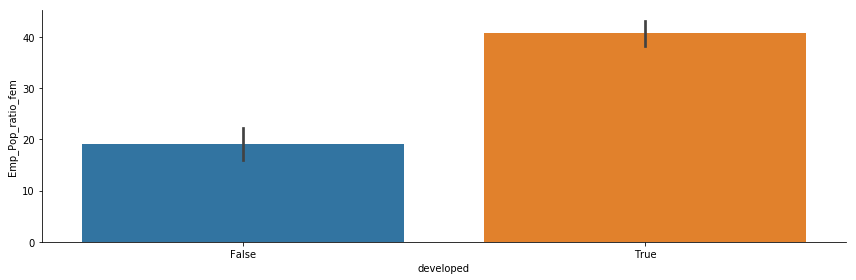

In [112]:
sns.factorplot(x='developed',y='Emp_Pop_ratio_fem',data=df_country_indicators_women2,kind='bar',aspect=3)

In [113]:
df_country_indicators_women3=df_country_indicators_women2.groupby('Country_Name')['GDP_per_person_employed','GDP_USD',\
                                                                                  'Emp_Pop_ratio_fem','Pop_fem_1564'].mean()

In [114]:
df_country_indicators_women3=df_country_indicators_women3.sort_values(by=['GDP_USD','GDP_per_person_employed','Emp_Pop_ratio_fem'],ascending=False)
df_country_indicators_women3.head(10)

Indicator_Name,GDP_per_person_employed,GDP_USD,Emp_Pop_ratio_fem,Pop_fem_1564
Country_Name,,,,
United States,70818.739865,1.190656e+13,39.578270,9.181589e+07
Canada,55727.237859,1.294165e+12,40.388676,1.039259e+07
India,6711.508472,9.977163e+11,22.684189,3.055188e+08
Pakistan,9439.418127,1.245496e+11,12.262757,3.735728e+07
Bangladesh,4192.644063,7.716706e+10,19.362243,3.725854e+07
Sri Lanka,13353.196315,3.782055e+10,23.363108,6.104678e+06
Nepal,2469.732732,1.104745e+10,57.702486,6.616212e+06
Afghanistan,3750.108049,6.523587e+09,9.879784,5.097688e+06
Bermuda,0.000000,4.014747e+09,0.000000,0.000000e+00


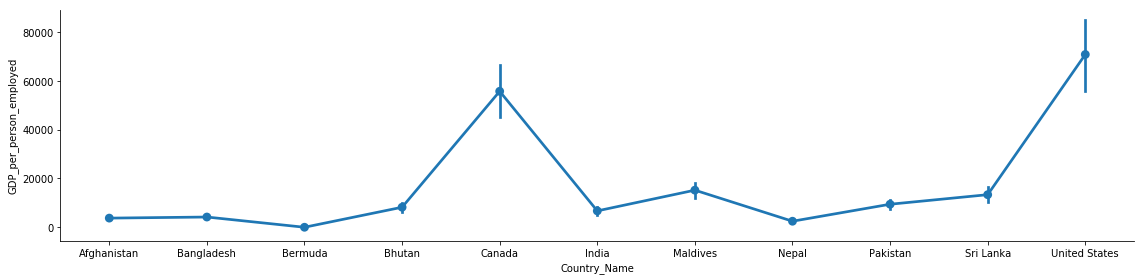

In [115]:
sns.factorplot(x='Country_Name',y='GDP_per_person_employed',data=df_country_indicators_women2,kind='point',aspect=4)

### Final Observation:
>* Both the North American nations of USA and Canada rank high in the GDP irrespective of per person employed or nominal GDP
* Although India is the third largest in the above list in terms of nominal GDP, it is 7th in terms of GDP per person employed and 8th in terms of GDP per person employed
* Interestingly, Maldives ranks first in GDP per person employed among South Asian nations followed by Sri Lanka and Pakistan


### Findings:
>* From the above analysis of GDP, USA and Canada are exceptions because even though they have a high women population, basic education and healthcare is available for women which contributes to high women employment and in turn higher GDP per employed persons
* On the other hand, Maldives has a high GDP_per_person_employed. Since its female population in the age of 15 - 64 is very low, the GDP per person employed has moved up. So, in this case, there is negligible female contribution to the economic growth of Maldives. 
* Third in the list is Pakistan. Even though it has a low female employment to population ratio, it has a high GDP per person employed. The reason is the economy is majorly driven by males with negligible female contribution 
* India and Sri Lanka have almost similar female employment to population ratio. But since population of India is much higher than Sri Lanka, naturally its GDP per person employed has gone down

#### To conclude, from the above findings, we see that there is a variation in the relation between GDP per person employed Vs female employment to population ratio. Hence, women employment in any country is not the only driving factor for GDP per person employed

## Analysis 3: Comparative study of CO2 emissions throughout the world
#### In this analysis, we have performed following steps
>* Correlation between the total CO2 emissions and CO2 emissions by type of fuel
* Correlation between the total CO2 emissions and CO2 emissions by activities
* Correlation between the total CO2 emissions in metric tons per capita and CO2 emissions by type of fuel
* Correlation between the total CO2 emissions in metric tons per capita and CO2 emissions by activities
* Analysis of CO2 emissions with GDP using Decision Tree
* Analysis of CO2 emissions in metric tons per capita with GDP per capita using Decision Tree

## Period: 2000 - 2017

#### 1. Picked out those indicator codes which represent 'GDP', 'GDP per capita', 'CO2 emissions (kilo ton)', 'CO2 emissions from solid fuel consumption (kilo ton)','CO2 emissions from liquid fuel consumption (kilo ton)', 'CO2 emissions from gaseous fuel consumption (kilo ton)', 'CO2 emissions from electricity and heat production', 'CO2 emissions from manufacturing industries and construction', 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services', 'CO2 emissions from residential buildings and commercial and public services' and 'CO2 emissions from transport'

In [116]:
df_country_indicators_CO2 = df_country_indicators.loc[((df_country_indicators.Indicator_Code=='EN.ATM.CO2E.KT')\
                                    |(df_country_indicators.Indicator_Code=='NY.GDP.PCAP.KD')\
                                    |(df_country_indicators.Indicator_Code=='EN.ATM.CO2E.PC')\
                                    |(df_country_indicators.Indicator_Code=='EN.CO2.ETOT.ZS')\
                                    |(df_country_indicators.Indicator_Code=='EN.CO2.MANF.ZS')\
                                    |(df_country_indicators.Indicator_Code=='EN.CO2.OTHX.ZS')\
                                    |(df_country_indicators.Indicator_Code=='EN.CO2.BLDG.ZS')\
                                    |(df_country_indicators.Indicator_Code=='EN.CO2.TRAN.ZS')\
                                    |(df_country_indicators.Indicator_Code=='NY.GDP.MKTP.KD')\
                                    |(df_country_indicators.Indicator_Code=='EN.ATM.CO2E.SF.KT')\
                                    |(df_country_indicators.Indicator_Code=='EN.ATM.CO2E.LF.KT')\
                                    |(df_country_indicators.Indicator_Code=='EN.ATM.CO2E.GF.KT'))]

In [117]:
df_country_indicators_CO2.head()

,Country_Code,Indicator_Name,Indicator_Code,year,value,Country_Name,Region,Income_Group
1194814,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,1981,1983.847000,Afghanistan,South Asia,Low income
1194815,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1981,0.151973,Afghanistan,South Asia,Low income
1194817,AFG,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1981,304.361000,Afghanistan,South Asia,Low income
1194819,AFG,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,1981,1015.759000,Afghanistan,South Asia,Low income
1194821,AFG,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,1981,333.697000,Afghanistan,South Asia,Low income


#### 2. Pivoted the dataframe to convert rows into columns

In [118]:
df_country_indicators_CO2_1 = pd.pivot_table(df_country_indicators_CO2,index=\
['Country_Code','year','Country_Name','Region','Income_Group'],columns='Indicator_Name',values='value')


In [119]:
df_country_indicators_CO2_1.reset_index(inplace=True)

#### 3. Filtered the dataframe to use values after year 2000 (since earlier years had a lot of null data)

In [120]:
df_country_indicators_CO2_1=df_country_indicators_CO2_1.loc[(df_country_indicators_CO2_1.year>'2000')]

#### 4. Checked for null values in the dataframe

In [121]:
df_country_indicators_CO2_1.isna().sum()

Indicator_Name
Country_Code                                                                                                                            0
year                                                                                                                                    0
Country_Name                                                                                                                            0
Region                                                                                                                                  0
Income_Group                                                                                                                            0
CO2 emissions (kt)                                                                                                                    802
CO2 emissions (metric tons per capita)                                                                                                805
CO2 emissions from 

#### 5. Renamed columns by giving short names

In [122]:
df_country_indicators_CO2_1.rename(columns={'CO2 emissions (kt)':'CO2_emis_kt','GDP (constant 2010 US$)':'GDP_const_USD',\
'GDP per capita (constant 2010 US$)':'GDP_PCAP_const_USD','CO2 emissions (metric tons per capita)':'CO2_emis_met_ton_pcap',\
'CO2 emissions from electricity and heat production, total (% of total fuel combustion)':'CO2_emis_elec_heat',\
'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)':'CO2_emis_manuf_const',\
'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)':'CO2_emis_other_sec',\
'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)':'CO2_emis_res_comm_bldg',\
'CO2 emissions from transport (% of total fuel combustion)':'CO2_emis_trans',\
'CO2 emissions from gaseous fuel consumption (kt)':'CO2Gas',\
'CO2 emissions from liquid fuel consumption (kt)':'CO2Liq',\
'CO2 emissions from solid fuel consumption (kt)':'CO2Sol'},inplace=True)

In [123]:
df_country_indicators_CO2_1[df_country_indicators_CO2_1.GDP_const_USD.isna()==True]

Indicator_Name,Country_Code,year,Country_Name,Region,Income_Group,CO2_emis_kt,CO2_emis_met_ton_pcap,CO2_emis_elec_heat,CO2Gas,CO2Liq,CO2_emis_manuf_const,CO2_emis_other_sec,CO2_emis_res_comm_bldg,CO2Sol,CO2_emis_trans,GDP_const_USD,GDP_PCAP_const_USD
20,ABW,2001,Aruba,Latin America & Caribbean,High income,2409.219,25.934024,NaN,0.000,2409.219,NaN,NaN,NaN,0.000,NaN,NaN,NaN
21,ABW,2002,Aruba,Latin America & Caribbean,High income,2438.555,25.671162,NaN,0.000,2438.555,NaN,NaN,NaN,0.000,NaN,NaN,NaN
22,ABW,2003,Aruba,Latin America & Caribbean,High income,2563.233,26.420452,NaN,0.000,2563.233,NaN,NaN,NaN,0.000,NaN,NaN,NaN
23,ABW,2004,Aruba,Latin America & Caribbean,High income,2618.238,26.517293,NaN,0.000,2618.238,NaN,NaN,NaN,0.000,NaN,NaN,NaN
24,ABW,2005,Aruba,Latin America & Caribbean,High income,2720.914,27.200708,NaN,0.000,2720.914,NaN,NaN,NaN,0.000,NaN,NaN,NaN
25,ABW,2006,Aruba,Latin America & Caribbean,High income,2717.247,26.948260,NaN,0.000,2717.247,NaN,NaN,NaN,0.000,NaN,NaN,NaN
26,ABW,2007,Aruba,Latin America & Caribbean,High income,2823.590,27.895574,NaN,0.000,2823.590,NaN,NaN,NaN,0.000,NaN,NaN,NaN
27,ABW,2008,Aruba,Latin America & Caribbean,High income,2658.575,26.230847,NaN,0.000,2658.575,NaN,NaN,NaN,0.000,NaN,NaN,NaN
28,ABW,2009,Aruba,Latin America & Caribbean,High income,2629.239,25.915833,NaN,0.000,2629.239,NaN,NaN,NaN,0.000,NaN,NaN,NaN
29,ABW,2010,Aruba,Latin America & Caribbean,High income,2508.228,24.670529,NaN,0.000,2508.228,NaN,NaN,NaN,0.000,NaN,NaN,NaN


#### 6. Removed null values

In [124]:
df_country_indicators_CO2_1.fillna(value=0,inplace=True)

#### 7. Confirmed if there are any null values

In [125]:
df_country_indicators_CO2_1.isna().sum()

Indicator_Name
Country_Code              0
year                      0
Country_Name              0
Region                    0
Income_Group              0
CO2_emis_kt               0
CO2_emis_met_ton_pcap     0
CO2_emis_elec_heat        0
CO2Gas                    0
CO2Liq                    0
CO2_emis_manuf_const      0
CO2_emis_other_sec        0
CO2_emis_res_comm_bldg    0
CO2Sol                    0
CO2_emis_trans            0
GDP_const_USD             0
GDP_PCAP_const_USD        0
dtype: int64

#### 8. Correlation between different indicators

In [126]:
df_country_indicators_CO2_corr=df_country_indicators_CO2_1.corr()
df_country_indicators_CO2_corr.reset_index(inplace=True)
df_country_indicators_CO2_corr_byfuel=df_country_indicators_CO2_corr.loc[(df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_kt')\
                                                                &( df_country_indicators_CO2_corr.Indicator_Name!='GDP_const_USD')\
                                                                & (df_country_indicators_CO2_corr.Indicator_Name!='GDP_PCAP_const_USD')\
                                                                & (df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_met_ton_pcap')\
                                                                &(df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_manuf_const')\
                                                                &(df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_elec_heat')\
                                                                &(df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_res_comm_bldg')\
                                                                &(df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_trans')\
                                                                &(df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_other_sec')]

In [127]:
df_country_indicators_CO2_corr_byfuel.head()

Indicator_Name,Indicator_Name,CO2_emis_kt,CO2_emis_met_ton_pcap,CO2_emis_elec_heat,CO2Gas,CO2Liq,CO2_emis_manuf_const,CO2_emis_other_sec,CO2_emis_res_comm_bldg,CO2Sol,CO2_emis_trans,GDP_const_USD,GDP_PCAP_const_USD
3,CO2Gas,0.665301,0.278075,0.244324,1.000000,0.856762,0.137834,-0.012259,0.200517,0.402224,0.072232,0.713665,0.159580
4,CO2Liq,0.856725,0.227549,0.225617,0.856762,1.000000,0.174996,-0.008725,0.162698,0.653127,0.090460,0.830208,0.161149
8,CO2Sol,0.945275,0.096310,0.155649,0.402224,0.653127,0.168094,-0.002795,0.054100,1.000000,-0.009242,0.508267,0.026613


### Correlation between the total CO2 emissions and CO2 emissions by type of fuel

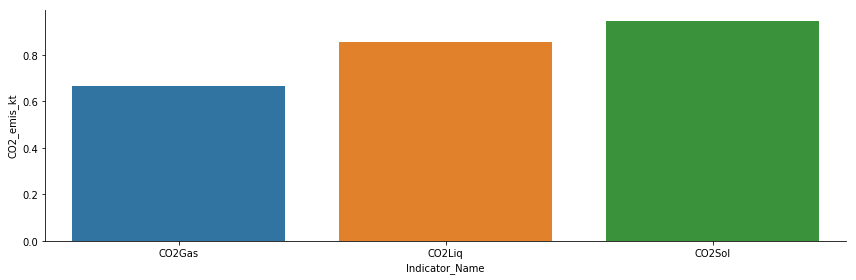

In [128]:
sns.factorplot(x='Indicator_Name',y='CO2_emis_kt',data=df_country_indicators_CO2_corr_byfuel,kind='bar',aspect=3)

#### We found that out of the total CO2 emission, CO2 emission by solid fuel consumption holds the top position followed by liquid fuel consumption and then gaseous fuel consumption

### Correlation between the total CO2 emissions and CO2 emissions by activities

In [129]:
df_country_indicators_CO2_corr_byactivity=df_country_indicators_CO2_corr.loc[(df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_kt')\
                                                                & (df_country_indicators_CO2_corr.Indicator_Name!='CO2_emis_met_ton_pcap')\
                                                                &( df_country_indicators_CO2_corr.Indicator_Name!='GDP_const_USD')\
                                                                & (df_country_indicators_CO2_corr.Indicator_Name!='GDP_PCAP_const_USD')\
                                                                & (df_country_indicators_CO2_corr.Indicator_Name!='CO2Sol')\
                                                                &(df_country_indicators_CO2_corr.Indicator_Name!='CO2Liq')\
                                                                &(df_country_indicators_CO2_corr.Indicator_Name!='CO2Gas')]

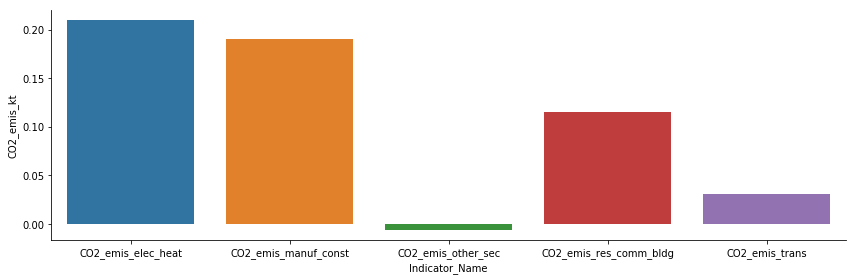

In [130]:
sns.factorplot(x='Indicator_Name',y='CO2_emis_kt',data=df_country_indicators_CO2_corr_byactivity,kind='bar',aspect=3)

### Observation:
#### We found that out of the total CO2 emission, CO2 emissions from electricity and heat production holds the top position followed by CO2 emissions from manufacturing industries and construction, CO2 emissions from residential buildings and commercial and public services, CO2 emissions from transport and finally CO2 emissions from other sectors, excluding residential buildings and commercial and public services

### Correlation between the total CO2 emissions in metric tons per capita and CO2 emissions by type of fuel 

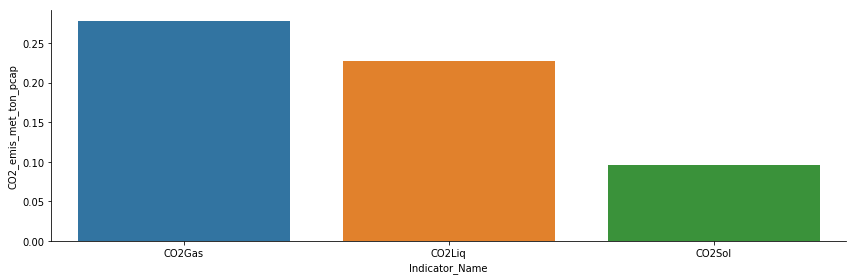

In [131]:
sns.factorplot(x='Indicator_Name',y='CO2_emis_met_ton_pcap',data=df_country_indicators_CO2_corr_byfuel,kind='bar',aspect=3)

### Observation:
#### We found that out of the total per capita CO2 emission, CO2 emission by gaseous fuel consumption holds the top position followed by liquid fuel consumption and then solid fuel consumption

### Correlation between the total CO2 emissions in metric tons per capita and CO2 emissions by activities

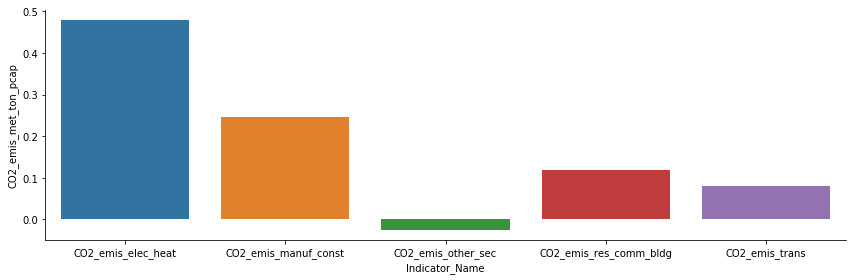

In [132]:
sns.factorplot(x='Indicator_Name',y='CO2_emis_met_ton_pcap',data=df_country_indicators_CO2_corr_byactivity,kind='bar',aspect=3)

### Observation:
#### We found that out of the total CO2 emission, CO2 emissions from electricity and heat production holds the top position followed by CO2 emissions from manufacturing industries and construction, CO2 emissions from residential buildings and commercial and public services, CO2 emissions from transport and finally CO2 emissions from other sectors, excluding residential buildings and commercial and public services

### By observing the above correlations, we came to a conclusion that order of CO2 emissions by activity remain the same regardless of whether it is compared with pure CO2 emissions or with CO2 emissions per capita. 
### Then, we decided to analyze the CO2 emissions with GDP and GDP per capita using Classification machine learning algorithm

## Machine Learning algorithm used: Classification using Decision Tree
### 1. Analysis of CO2 emissions with GDP
#### 1.1 In this case, we used GDP as our dependent variable. So first we found the mean of GDP

In [133]:
df_country_indicators_CO2_1.reset_index(inplace=True)

In [134]:
df_country_indicators_CO2_1.GDP_const_USD.mean()

304852379862.43085

In [135]:
df_country_indicators_CO2_1.GDP_PCAP_const_USD.mean()

12804.589206390365

In [136]:
df_country_indicators_CO2_1.CO2_emis_kt.mean()

114777.58968302225

#### 1.2 Split the dependent variable 'GDP' into two. Those with values greater than the mean would be 1 and the remaining would be 0

In [137]:
df_country_indicators_CO2_1['GDP_USD'] = df_country_indicators_CO2_1['GDP_const_USD'].apply(lambda x: 1 if x >= 3E+11 \
                            else 0)

In [138]:
df_country_indicators_CO2_2=df_country_indicators_CO2_1.copy()
#df_country_indicators_CO2_1.drop(['GDP_const_USD'],axis=1,inplace=True)

In [139]:
df_country_indicators_CO2_1.set_index(['year','Country_Name','Country_Code','Region','Income_Group',\
                                       'GDP_const_USD','GDP_PCAP_const_USD'],inplace=True)

In [140]:
X=df_country_indicators_CO2_1.drop('GDP_USD',axis=1)

In [141]:
Y=df_country_indicators_CO2_1.GDP_USD

In [142]:
dt3 = tree.DecisionTreeClassifier(max_depth=1)

In [143]:
dt3.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

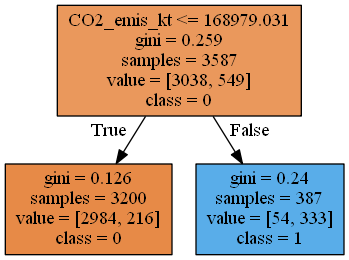

In [144]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt3, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Countries where CO2 emissions is greater than 169000, the GDP is expected to be greater than its mean of USD 3E+11. We have tried to show the same using a bar plot

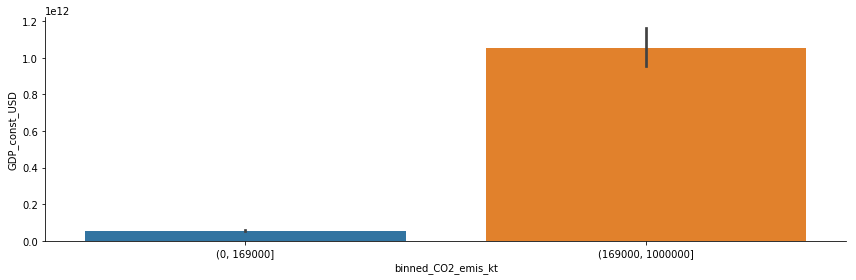

In [145]:
df_country_indicators_CO2_2_plot = df_country_indicators_CO2_2.copy()
df_country_indicators_CO2_2_plot['binned_CO2_emis_kt']=pd.cut(df_country_indicators_CO2_2_plot.CO2_emis_kt, bins=[0,169000,1000000])
sns.factorplot(x='binned_CO2_emis_kt',y='GDP_const_USD',data=df_country_indicators_CO2_2_plot,kind='bar',aspect=3)

#### Let's have a look at those countries

In [146]:
df_country_indicators_CO2_2.head()

Indicator_Name,index,Country_Code,year,Country_Name,Region,Income_Group,CO2_emis_kt,CO2_emis_met_ton_pcap,CO2_emis_elec_heat,CO2Gas,CO2Liq,CO2_emis_manuf_const,CO2_emis_other_sec,CO2_emis_res_comm_bldg,CO2Sol,CO2_emis_trans,GDP_const_USD,GDP_PCAP_const_USD,GDP_USD
0,20,ABW,2001,Aruba,Latin America & Caribbean,High income,2409.219,25.934024,0.0,0.0,2409.219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,21,ABW,2002,Aruba,Latin America & Caribbean,High income,2438.555,25.671162,0.0,0.0,2438.555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,22,ABW,2003,Aruba,Latin America & Caribbean,High income,2563.233,26.420452,0.0,0.0,2563.233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,23,ABW,2004,Aruba,Latin America & Caribbean,High income,2618.238,26.517293,0.0,0.0,2618.238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,24,ABW,2005,Aruba,Latin America & Caribbean,High income,2720.914,27.200708,0.0,0.0,2720.914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [147]:
df_country_indicators_CO2_2.reset_index(inplace=True)

#### First we checked the top 10 countries where the overall CO2 emission in kt is higher than 169000

In [148]:
df_CO2_emitting_countries=df_country_indicators_CO2_2.loc[(df_country_indicators_CO2_2.CO2_emis_kt >= 169000)]

In [149]:
df_top10_CO2_emitting=df_CO2_emitting_countries.groupby('Country_Name')['CO2_emis_kt','GDP_const_USD','GDP_PCAP_const_USD'].mean()
df_top10_CO2_emitting=df_top10_CO2_emitting.sort_values(by=['CO2_emis_kt'],ascending=False).head(10)
df_top10_CO2_emitting.reset_index(inplace=True)
df_top10_CO2_emitting

Indicator_Name,Country_Name,CO2_emis_kt,GDP_const_USD,GDP_PCAP_const_USD
0,China,7.229357e+06,5.001334e+12,3760.235612
1,United States,5.502902e+06,1.463306e+13,48367.795081
2,Russia,1.664992e+06,1.413157e+12,9832.700839
3,India,1.531667e+06,1.401203e+12,1165.224807
4,Japan,1.215853e+06,5.664087e+12,44347.804700
5,Germany,7.806032e+05,3.370769e+12,41231.398737
6,Canada,5.392530e+05,1.574200e+12,47378.080001
7,Iran,5.215792e+05,4.290312e+11,5892.018413
8,Korea,5.164116e+05,9.940292e+11,20244.001351
9,United Kingdom,5.033073e+05,2.419637e+12,39218.697294


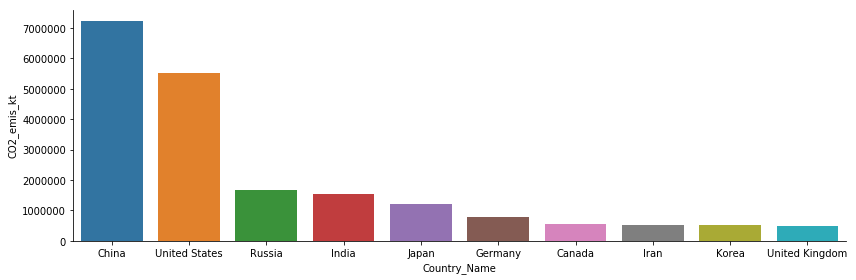

In [150]:
sns.factorplot(y='CO2_emis_kt',x='Country_Name',data=df_top10_CO2_emitting,kind='bar',aspect=3)

#### Observations:
>* China emits more CO2 than US and Russia put together
* India is the world's 4th biggest CO2 emitter pushing Japan to the 5th position

### 2. Analysis of CO2 emissions in metric tons per capita with GDP per capita
#### 2.1 In this case, we used GDP per capita as our dependent variable. So first we found the mean of GDP per capita

In [151]:
df_country_indicators_CO2_1.reset_index(inplace=True)

In [152]:
df_country_indicators_CO2_1.GDP_PCAP_const_USD.mean()

12804.589206390365

#### 2.2 Split the dependent variable 'GDP per capita' into two. Those with values greater than the mean would be 1 and the remaining would be 0

In [153]:
df_country_indicators_CO2_1['GDP_PCAP_USD'] = df_country_indicators_CO2_1['GDP_PCAP_const_USD'].apply(lambda x: 1 if x >= 12800 \
                            else 0)

In [154]:
df_country_indicators_CO2_2=df_country_indicators_CO2_1.copy()
df_country_indicators_CO2_1.drop(['GDP_PCAP_const_USD'],axis=1,inplace=True)

In [155]:
df_country_indicators_CO2_1.set_index(['year','Country_Name','Country_Code','Region','Income_Group'],inplace=True)

In [156]:
X=df_country_indicators_CO2_1.drop('GDP_PCAP_USD',axis=1)

In [157]:
Y=df_country_indicators_CO2_1.GDP_PCAP_USD

In [158]:
dt4 = tree.DecisionTreeClassifier(max_depth=1)

In [159]:
dt4.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

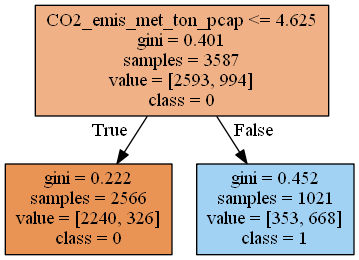

In [160]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt4, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Countries where CO2 emissions per capita is greater than or equal to 4.6, the GDP per capita is expected to be greater than its mean of USD 12800. We have tried to show the same using a bar plot

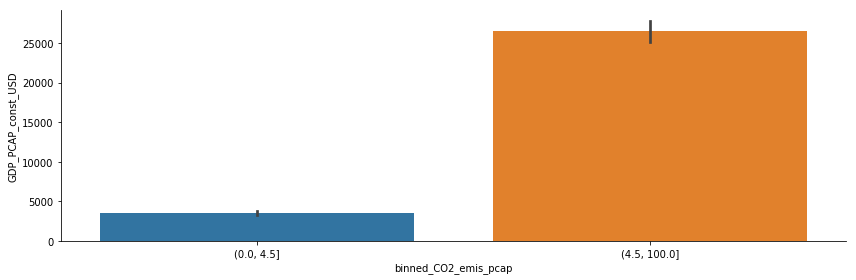

In [161]:
df_country_indicators_CO2_pcap_plot = df_country_indicators_CO2_2.copy()
df_country_indicators_CO2_pcap_plot['binned_CO2_emis_pcap']=pd.cut(df_country_indicators_CO2_pcap_plot.CO2_emis_met_ton_pcap, bins=[0,4.5,100])
sns.factorplot(x='binned_CO2_emis_pcap',y='GDP_PCAP_const_USD',data=df_country_indicators_CO2_pcap_plot,kind='bar',aspect=3)

#### Let's have a look at those countries

In [162]:
df_country_indicators_CO2_2.head()

Indicator_Name,year,Country_Name,Country_Code,Region,Income_Group,GDP_const_USD,GDP_PCAP_const_USD,index,CO2_emis_kt,CO2_emis_met_ton_pcap,CO2_emis_elec_heat,CO2Gas,CO2Liq,CO2_emis_manuf_const,CO2_emis_other_sec,CO2_emis_res_comm_bldg,CO2Sol,CO2_emis_trans,GDP_USD,GDP_PCAP_USD
0,2001,Aruba,ABW,Latin America & Caribbean,High income,0.0,0.0,20,2409.219,25.934024,0.0,0.0,2409.219,0.0,0.0,0.0,0.0,0.0,0,0
1,2002,Aruba,ABW,Latin America & Caribbean,High income,0.0,0.0,21,2438.555,25.671162,0.0,0.0,2438.555,0.0,0.0,0.0,0.0,0.0,0,0
2,2003,Aruba,ABW,Latin America & Caribbean,High income,0.0,0.0,22,2563.233,26.420452,0.0,0.0,2563.233,0.0,0.0,0.0,0.0,0.0,0,0
3,2004,Aruba,ABW,Latin America & Caribbean,High income,0.0,0.0,23,2618.238,26.517293,0.0,0.0,2618.238,0.0,0.0,0.0,0.0,0.0,0,0
4,2005,Aruba,ABW,Latin America & Caribbean,High income,0.0,0.0,24,2720.914,27.200708,0.0,0.0,2720.914,0.0,0.0,0.0,0.0,0.0,0,0


In [163]:
df_country_indicators_CO2_2.reset_index(inplace=True)

#### First we checked the top 10 countries where the overall CO2 emission per capita is higher than or equal to 4.6

In [164]:
df_CO2_pcap_emitting_countries=df_country_indicators_CO2_2.loc[(df_country_indicators_CO2_2.CO2_emis_met_ton_pcap >= 4.6)]

In [165]:
df_top10_CO2_pcap_emitting=df_CO2_pcap_emitting_countries.groupby('Country_Name')['CO2_emis_met_ton_pcap','GDP_PCAP_const_USD','GDP_const_USD'].mean()
df_top10_CO2_pcap_emitting=df_top10_CO2_pcap_emitting.sort_values(by=['CO2_emis_met_ton_pcap'],ascending=False).head(10)
df_top10_CO2_pcap_emitting.reset_index(inplace=True)
df_top10_CO2_pcap_emitting

Indicator_Name,Country_Name,CO2_emis_met_ton_pcap,GDP_PCAP_const_USD,GDP_const_USD
0,Qatar,51.588549,66215.753709,9.277049e+10
1,Trinidad and Tobago,30.880916,15000.071933,1.974154e+10
2,Kuwait,29.048180,41804.149133,1.131796e+11
3,United Arab Emirates,23.403999,47311.146651,2.794978e+11
4,Aruba,22.701837,0.000000,0.000000e+00
5,Bahrain,22.501525,21647.632963,2.263860e+10
6,Luxembourg,21.522026,102982.765595,5.053282e+10
7,Brunei,18.417353,35967.055375,1.352977e+10
8,United States,18.251472,48367.795081,1.463306e+13
9,Australia,17.205657,50279.473434,1.072972e+12


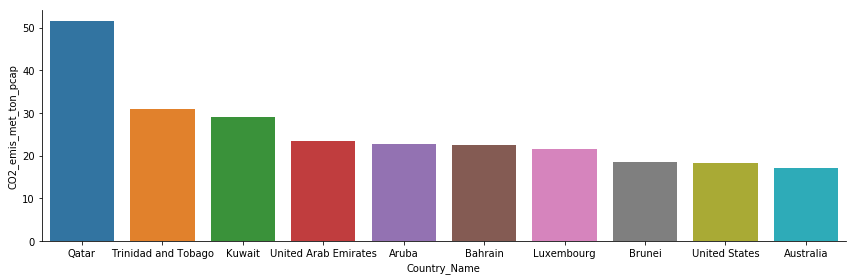

In [166]:
sns.factorplot(y='CO2_emis_met_ton_pcap',x='Country_Name',data=df_top10_CO2_pcap_emitting,kind='bar',aspect=3)

#### We see a contrast here
>* Some of the smallest countries like Qatar emits the most CO2 of 51 tons per person
* US is still in the top 10 positions among the biggest economies

### Final Observations:
>* By analyzing the CO2 emssions with the  GDP (constant 2010 US\$), we observed that the top economies (China, US, Russia, Japan, etc.) are the highest in the CO2 emissions which is obvious.
* In contrast, when we compared the CO2 emissions in metric tons per capita with the GDP per capita, we observed that some of the world's smallest countries like Qatar, Trinidad and Tobago, Kuwait, etc top the list in CO2 emissions per capita.
* Also, Luxembourg has an annual GDP of about 50 billion and an average GDP per capita of 100,000 dollars. To put that into perspective, with 600 times the amount of people than Luxembourg, has an average GDP per capita of only 48000 dollars, abot half the average of Luxembourg 

### Findings:
>* From the above analysis of GDP, China is the 2nd largest economy in the world with high overall CO2 emissions, but it is not even in the top 10 per capita gdp which means it is still relatively poor. China has a big nominal GDP because of its 1.4 billion population
* On the other hand, inspite of not being present in the top 10 GDP list, Qatar ranks high in the per capita gdp which means it is one of the richest countries in the world. The average individual of Qatar is richer than China because it is emitting more CO2 per person
>>For example, lets say in China, every person produce 6 tons on average of CO2 emission per year. So, it will have a gdp of 8.4 billion. On the other hand if lets say Qatar with a population of 2.5 million people and they produce 51 tons of CO2 emission per year, it will have a gdp of 127.5 million which is way lower than China but way richer than China. Therefore in normal gdp terms China is higher, while in per capita gdp terms Qatar is higher.
* For all the above observations, US remains an exception as it is present in the top 10 list of nominal GDP as well as per capita GDP. Also, its overall CO2 emissions as well as per capita CO2 emissions are higher. Hence, we can conclude that it is wealthy as a country as well as at an individual level
* Another exception is Luxembourg where GDP per capita is highest inspite of moderate levels of per capita CO2 emission. Being a hub of banking and financial services, per capita CO2 emissions play a little role in the GDP per capita